# The Spark Foundation


#   Task 2 :  Prediction using unsupervised learning(Titanic Dataset)

## By : Kumuda D K

In [51]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [52]:
import pandas as pd
### Let's import our data and read it

titanic =pd.read_csv(r'C:\Users\asus\Downloads\train.csv')
test= pd.read_csv(r'C:\Users\asus\Downloads\test.csv')

In [53]:
titanic= pd.DataFrame(titanic)
print(titanic)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [54]:
titanic.head()
#print data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
titanic.shape

(891, 12)

In [56]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [57]:

titanic = titanic.append(test , ignore_index = True)
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


### Cleaning the data

In [58]:
titanic.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#initialize label endoce as first step.
le = LabelEncoder()

titanic['Sex'] = le.fit_transform(titanic['Sex'].values)

In [60]:
titanic = titanic.drop('Name', axis=1,)
titanic = titanic.drop('Ticket', axis=1,)
titanic = titanic.drop('Fare', axis=1,)
titanic= titanic.drop('Cabin', axis=1,)
titanic= titanic.drop('Embarked', axis=1,)


In [61]:
titanic.info()

titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
Age            1046 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int32
SibSp          1309 non-null int64
Survived       891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 66.6 KB


,Age,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,0,1,3,1,1,0.0
1,38.0,0,2,1,0,1,1.0
2,26.0,0,3,3,0,0,1.0
3,35.0,0,4,1,0,1,1.0
4,35.0,0,5,3,1,0,0.0


In [62]:

titanic=titanic[~titanic['Age'].isna()]

In [63]:

titanic=titanic[~titanic['Survived'].isna()]

In [64]:

titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
Age            714 non-null float64
Parch          714 non-null int64
PassengerId    714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null int32
SibSp          714 non-null int64
Survived       714 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 41.8 KB


,Age,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,0,1,3,1,1,0.0
1,38.0,0,2,1,0,1,1.0
2,26.0,0,3,3,0,0,1.0
3,35.0,0,4,1,0,1,1.0
4,35.0,0,5,3,1,0,0.0


### Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196AA1C3550>,
      dtype=object)

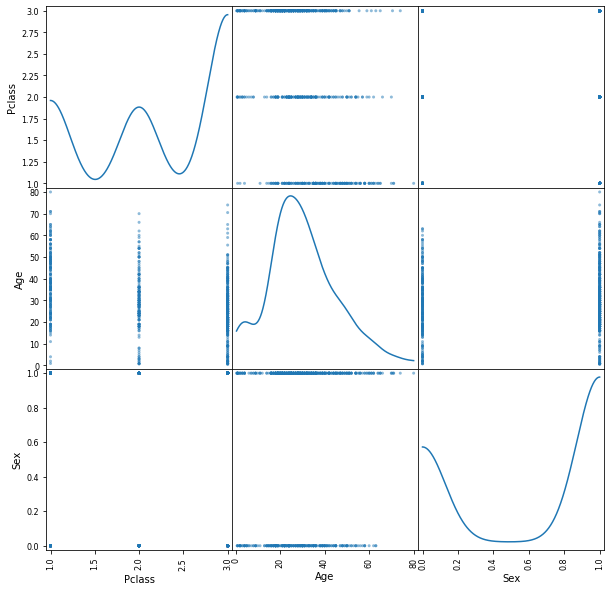

In [65]:
cols=['Pclass','Age','Sex']
pd.plotting.scatter_matrix(titanic[cols], figsize = (10, 10), diagonal = 'kde')

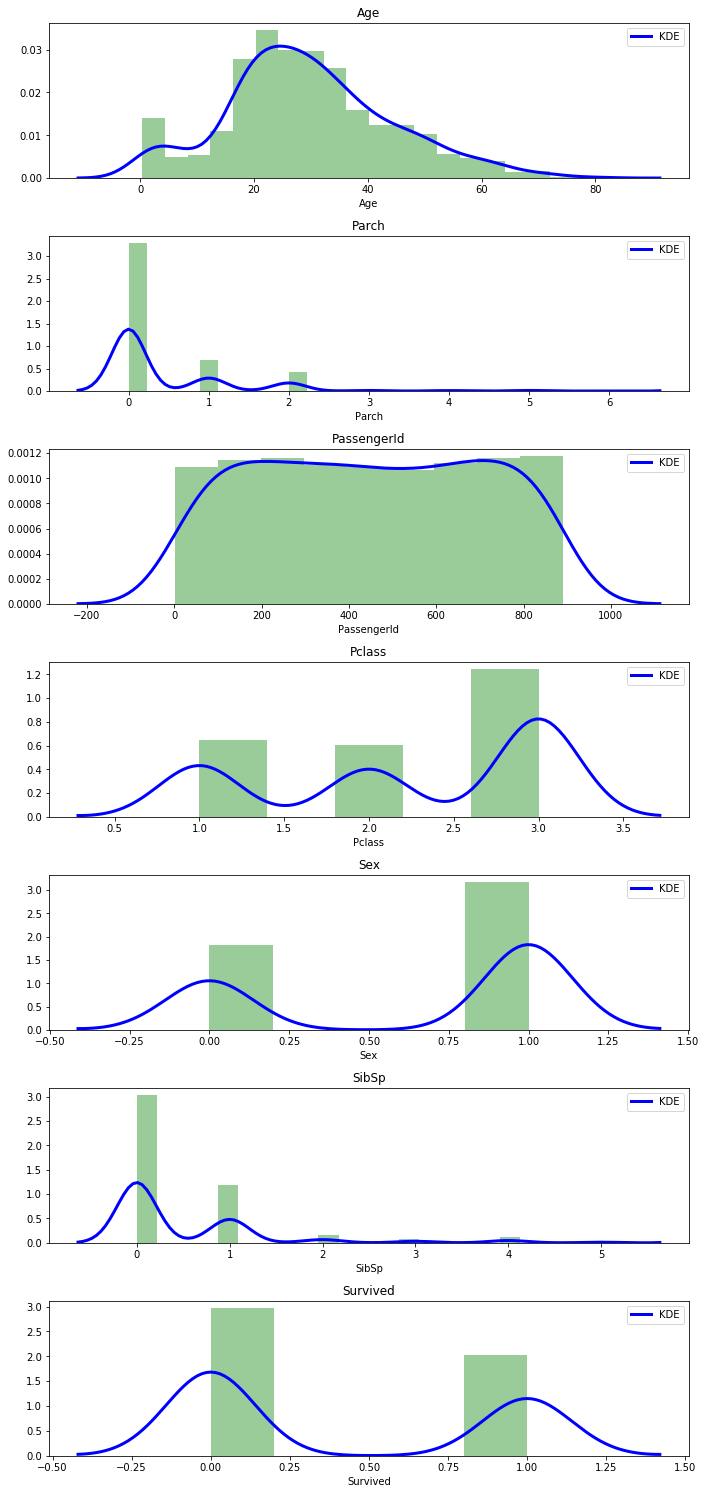

In [66]:
plt.figure(figsize=(10,50))

for i in range(len(titanic.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(titanic[titanic.columns[i]],kde_kws={"color":"b", "lw":3 ,'label':'KDE'},hist_kws={"color":'g'})
    plt.title(titanic.columns[i])
    
plt.tight_layout()

In [67]:
titanic['Age'].mean()

29.69911764705882

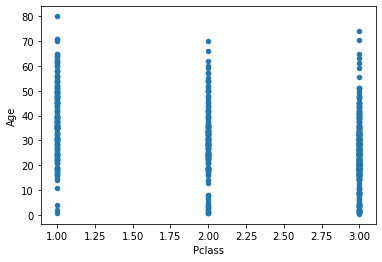

In [68]:
titanic.plot.scatter(x="Pclass", y="Age")

In [69]:

y =titanic['Survived']

In [70]:

X=titanic['Sex']

In [71]:
X=titanic.iloc[:,:4].values
y=titanic.iloc[:, 1].values
print(X)
print(y)

[[ 22.   0.   1.   3.]
 [ 38.   0.   2.   1.]
 [ 26.   0.   3.   3.]
 ...
 [ 19.   0. 888.   1.]
 [ 26.   0. 890.   1.]
 [ 32.   0. 891.   3.]]
[0 0 0 0 0 0 1 2 0 1 0 0 5 0 0 1 0 0 0 0 0 1 5 2 0 0 0 0 0 0 0 0 0 2 0 0 1
 0 0 0 1 0 0 2 2 0 0 0 2 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 0 3 2 0 0 0 0 2 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 1 0 2 2 0 0 0 0 2 1 0 0 1 0 0 0 1 2 4 0 0 1 1 0 0 1 0 0 0 2 1 2
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 1 0 1 0 0 2 2 0 0 1 2 1 0 0 1 0 1 0 0 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 2 0 0 0 0 2 1 0 1 0 0 0 2 1 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 2 0 0 0 0 0 1 0 0 1 0 0 1 0 4 0 1 0 0 0 0 0
 0 0 0 1 0 2 0 0 0 2 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 2 0 2 0 0 1 1 0 0 0 0 0 0 0 2 2 3 4 0 1 0 0 0 2 1 0 1 0 2 0 0 0 0 0 0 0
 0 0 0 0 1 0 2 0 0 0 0 0 1 2 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 

### Data spliting

In [72]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2,random_state=0)


### Training and testing the model

In [73]:

#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.7062937062937062


In [74]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.993006993006993


# Thank you !